# Loan Data Project 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
df = pd.read_csv("loan_data.csv")

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

In [6]:
sns.set(style='whitegrid')

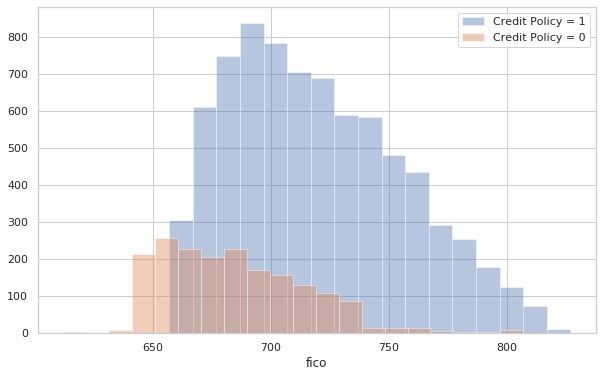

In [7]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['credit.policy']==1,'fico'],kde=False,bins=20,label='Credit Policy = 1')
sns.distplot(df.loc[df['credit.policy']==0,'fico'],kde=False,bins=20,label='Credit Policy = 0')
plt.legend()

Similar histogram, except this time the labels are the not.fully.paid column

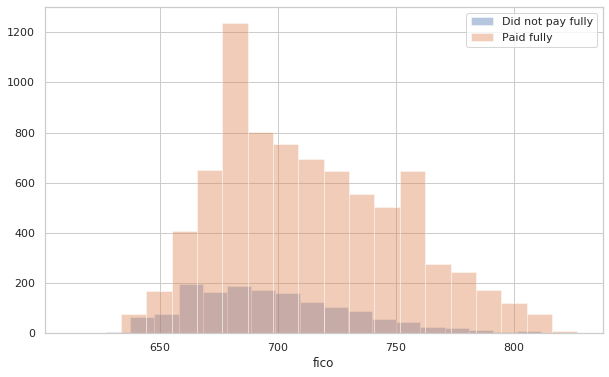

In [8]:
fig = plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['not.fully.paid']==1,'fico'],kde=False,bins=20,label='Did not pay fully')
sns.distplot(df.loc[df['not.fully.paid']==0,'fico'],kde=False,bins=20,label='Paid fully')
plt.legend()

Countplot showing the counts of loans by purpose, with the color hue defined by not.fully.paid

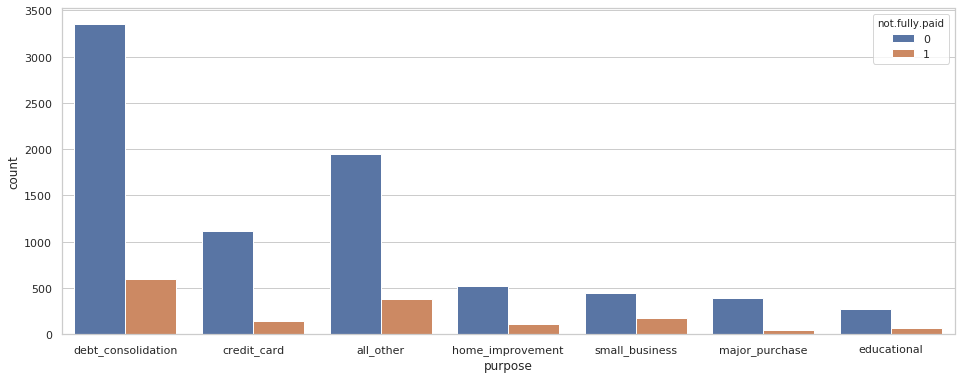

In [9]:
fig = plt.figure(figsize=(16,6))
sns.countplot(data=df,x='purpose',hue='not.fully.paid')

Trend between FICO score and interest rate

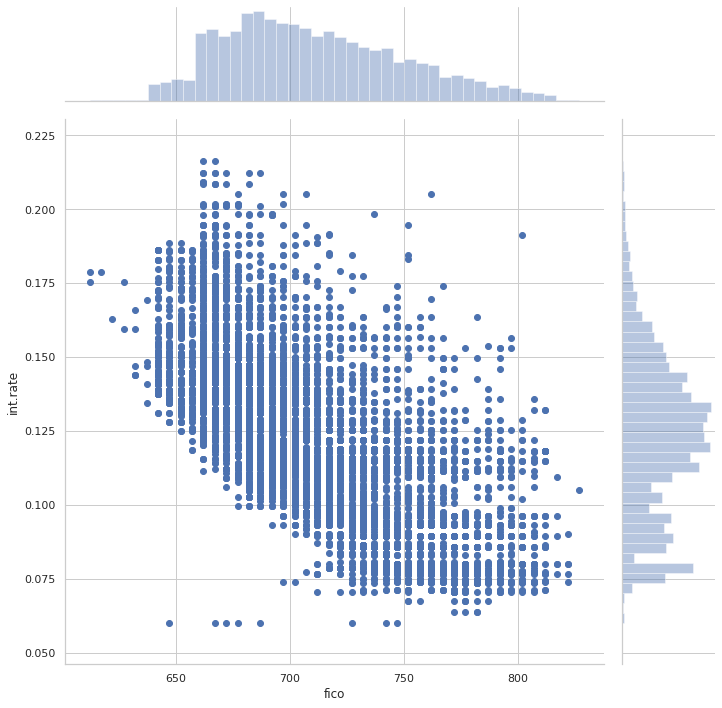

In [10]:
sns.jointplot(data=df,x='fico',y='int.rate',height=10)

Created lmplots to see if the trend differed between not.fully.paid and credit.policy.

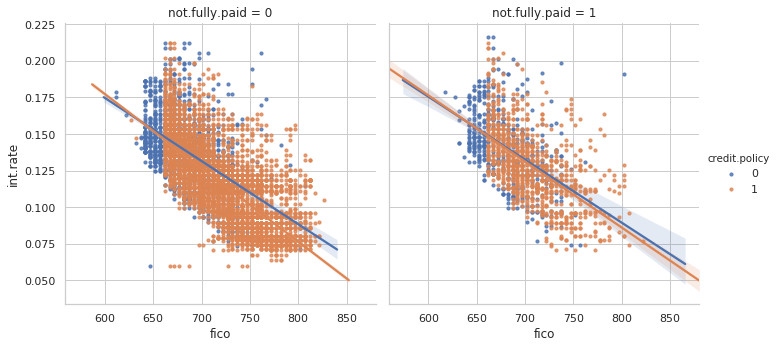

In [18]:
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid',scatter_kws={'s':10})

# Setting up the Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

In [31]:
df2=pd.get_dummies(df['purpose'],drop_first=True)
df = df.drop('purpose',axis=1)
df=pd.concat([df,df2],axis=1)

## Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [39]:
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## Training a Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [43]:
yhat = dtree.predict(X_test)

In [44]:
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2659
           1       0.20      0.22      0.21       502

   micro avg       0.74      0.74      0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



In [46]:
print(confusion_matrix(y_test,yhat))

[[2224  435]
 [ 391  111]]


## Training the Random Forest model

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfor = RandomForestClassifier(n_estimators=600)

In [52]:
rfor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation

In [53]:
yhat2 = rfor.predict(X_test)

In [54]:
print(classification_report(y_test,yhat2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2659
           1       0.50      0.02      0.05       502

   micro avg       0.84      0.84      0.84      3161
   macro avg       0.67      0.51      0.48      3161
weighted avg       0.79      0.84      0.78      3161



In [55]:
print(confusion_matrix(y_test,yhat2))

[[2647   12]
 [ 490   12]]


### Random Forest seems to have performed better than a single decision tree